In [12]:
import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
(x_train,y_train), (x_test,y_test) = mnist.load_data()

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


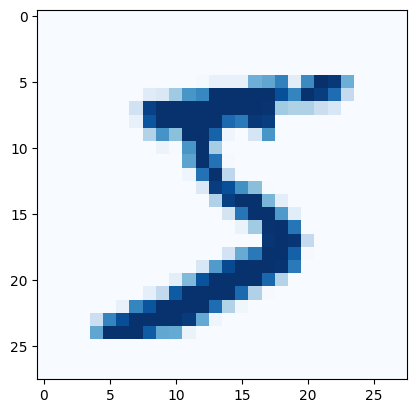

In [3]:
plt.imshow(x_train[0],cmap=plt.cm.Blues)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [4]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

x_train = x_train/255
x_test = x_test/255

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [5]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(input_dim = 28*28, units = 500, activation = "relu"))
model.add(tf.keras.layers.Dense(units = 100, activation = "relu"))
model.add(tf.keras.layers.Dense(units = 10, activation = "softmax"))

model.compile(loss = "categorical_crossentropy", optimizer = "Adam", metrics = ["accuracy"])
model.fit(x_train, y_train, batch_size = 600, epochs = 40)

Epoch 1/40
100/100 [==============================] - 3s 5ms/step - loss: 0.3958 - accuracy: 0.8922
Epoch 2/40
100/100 [==============================] - 1s 6ms/step - loss: 0.1461 - accuracy: 0.9577
Epoch 3/40
100/100 [==============================] - 0s 5ms/step - loss: 0.0964 - accuracy: 0.9720
Epoch 4/40
100/100 [==============================] - 0s 5ms/step - loss: 0.0701 - accuracy: 0.9794
Epoch 5/40
100/100 [==============================] - 1s 5ms/step - loss: 0.0522 - accuracy: 0.9849
Epoch 6/40
100/100 [==============================] - 1s 6ms/step - loss: 0.0409 - accuracy: 0.9876
Epoch 7/40
100/100 [==============================] - 0s 5ms/step - loss: 0.0312 - accuracy: 0.9913
Epoch 8/40
100/100 [==============================] - 0s 4ms/step - loss: 0.0257 - accuracy: 0.9928
Epoch 9/40
100/100 [==============================] - 0s 4ms/step - loss: 0.0195 - accuracy: 0.9950
Epoch 10/40
100/100 [==============================] - 0s 3ms/step - loss: 0.0145 - accuracy: 0.9966

In [6]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0839 - accuracy: 0.9828


[0.08386782556772232, 0.9828000068664551]

In [31]:
x_train_c = x_train.reshape(x_train.shape[0],int(math.sqrt(x_train.shape[1])),int(math.sqrt(x_train.shape[1])))
x_test_c = x_test.reshape(x_test.shape[0],int(math.sqrt(x_test.shape[1])),int(math.sqrt(x_test.shape[1])))

In [46]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Conv2D(50,(3,3), activation = "relu", input_shape = (x_train_c.shape[1],x_train_c.shape[2],1)))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.MaxPooling2D((2,2)))
model2.add(tf.keras.layers.Conv2D(50,(3,3), activation = "relu", input_shape = (x_train_c.shape[1],x_train_c.shape[2],1)))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.MaxPooling2D((2,2)))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(units = 10, activation = "softmax"))

model2.compile(loss = "categorical_crossentropy", optimizer = "Adam", metrics = ["accuracy"])
model2.fit(x_train_c, y_train, batch_size = 600, epochs = 40)

Epoch 1/40
100/100 [==============================] - 2s 18ms/step - loss: 0.5901 - accuracy: 0.8275
Epoch 2/40
100/100 [==============================] - 2s 17ms/step - loss: 0.1563 - accuracy: 0.9534
Epoch 3/40
100/100 [==============================] - 2s 18ms/step - loss: 0.1076 - accuracy: 0.9681
Epoch 4/40
100/100 [==============================] - 2s 17ms/step - loss: 0.0901 - accuracy: 0.9727
Epoch 5/40
100/100 [==============================] - 2s 17ms/step - loss: 0.0776 - accuracy: 0.9761
Epoch 6/40
100/100 [==============================] - 2s 17ms/step - loss: 0.0699 - accuracy: 0.9784
Epoch 7/40
100/100 [==============================] - 2s 17ms/step - loss: 0.0635 - accuracy: 0.9804
Epoch 8/40
100/100 [==============================] - 2s 17ms/step - loss: 0.0595 - accuracy: 0.9821
Epoch 9/40
100/100 [==============================] - 2s 17ms/step - loss: 0.0553 - accuracy: 0.9828
Epoch 10/40
100/100 [==============================] - 2s 17ms/step - loss: 0.0517 - accura

In [47]:
model2.evaluate(x_test_c,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0479 - accuracy: 0.9915


[0.04785701259970665, 0.9915000200271606]